In [1]:
Section 2.2 Some basic data analysis

SyntaxError: invalid syntax (<ipython-input-1-1742560cf994>, line 1)

In [2]:
Section 2.2 Some basic data analysis

SyntaxError: invalid syntax (<ipython-input-2-1742560cf994>, line 1)

In [3]:
import pandas as pd

In [4]:
reviews = pd.read_csv("./ign.csv")

In [5]:
reviews.shape()

TypeError: 'tuple' object is not callable

In [7]:
reviews.head(5)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [8]:
del reviews["Unnamed: 0"]
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [9]:
reviews['mean'].mean()

KeyError: 'mean'

In [10]:
reviews['score'].mean()

6.950459060402666

In [14]:
len(reviews[reviews['score']>reviews['score'].mean()])

11373

In [12]:
%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('ggplot')

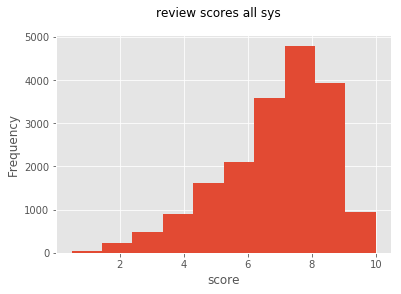

In [19]:
reviews['score'].plot(kind='hist');
plot.xlabel('score');
plot.suptitle('review scores all sys');

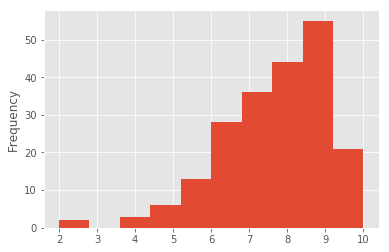

In [20]:
xbox = reviews[reviews["platform"]=="Xbox One"]["score"].plot(kind='hist') 

In [21]:
import seaborn as sns

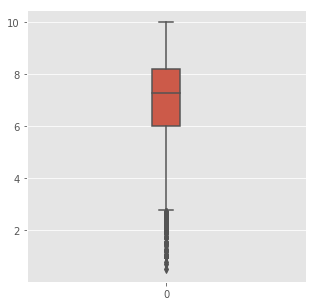

In [25]:
plot.subplots(figsize=(5,5));
sns.boxplot(data=reviews['score'],width=0.10);

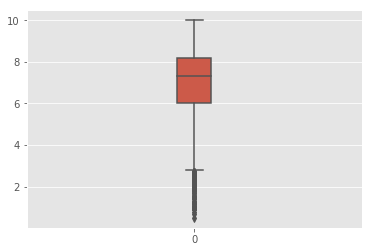

In [28]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


In [27]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


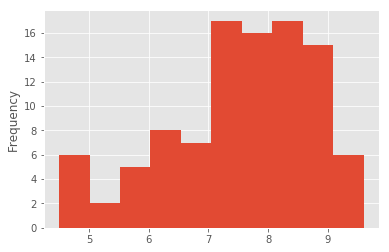

In [29]:
xbox = reviews[reviews["platform"]=="iPad"]["score"].plot(kind='hist') 

<Figure size 1440x1440 with 0 Axes>

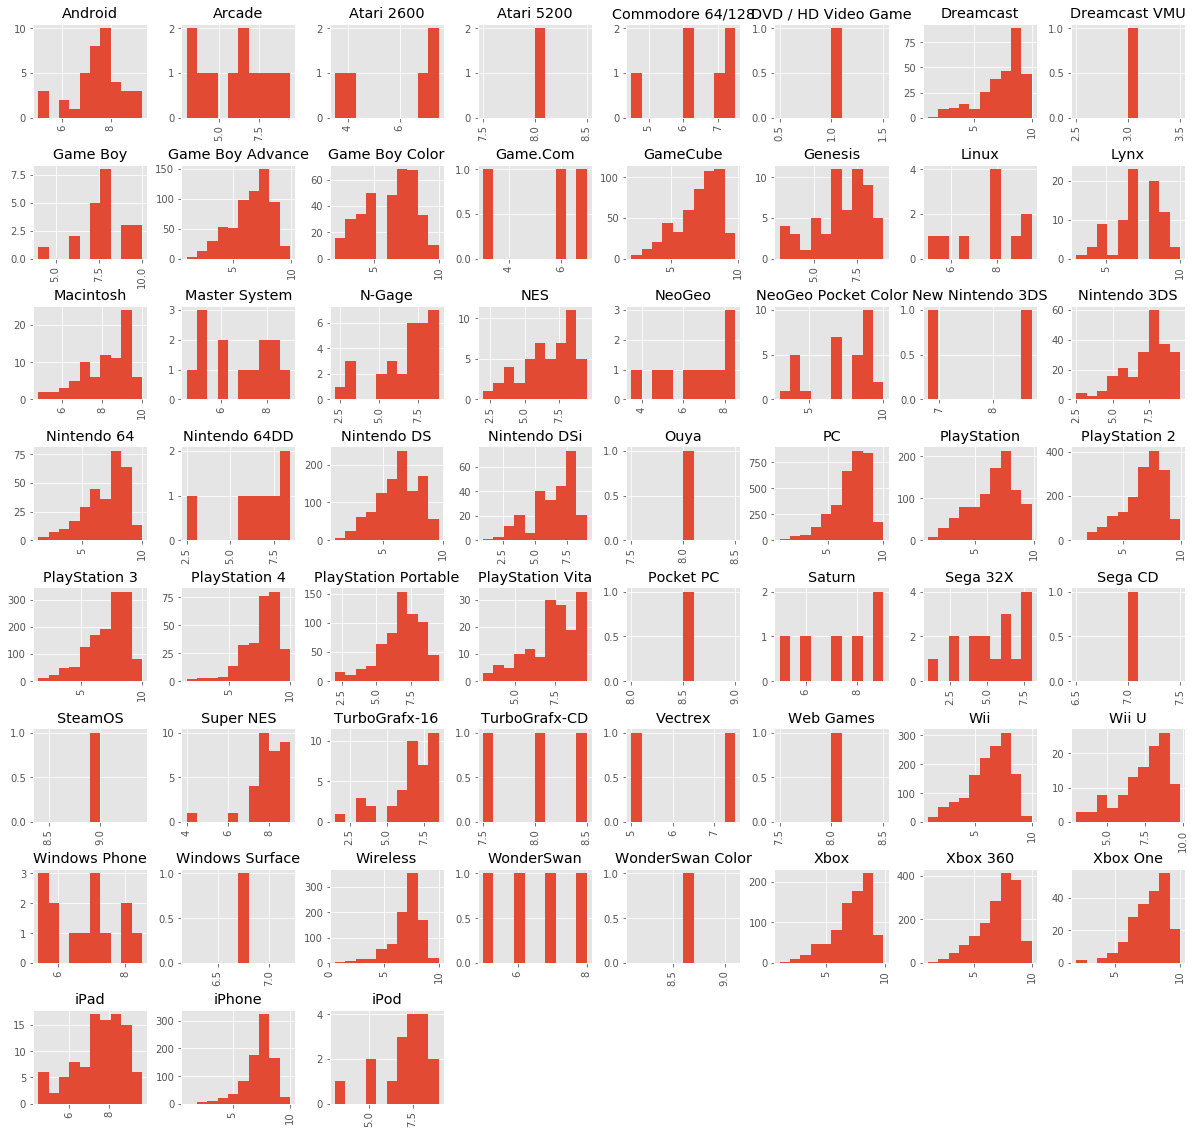

In [30]:
plot.figure(figsize=(20,20));
plot.rcParams["figure.figsize"] = [20,20];
reviews['score'].hist(by = reviews['platform']);

## Section 3.1 Reading in data

In [31]:
from sklearn import datasets
digits = datasets.load_digits()

In [32]:
type(digits)

sklearn.utils.Bunch

In [33]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [34]:
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [37]:
digits_data = digits.data

In [38]:
digits_data.shape

(1797, 64)

In [39]:
digits_target = digits.target
digits_target.shape

(1797,)

In [40]:
digits_images = digits.images
digits_images.shape

(1797, 8, 8)

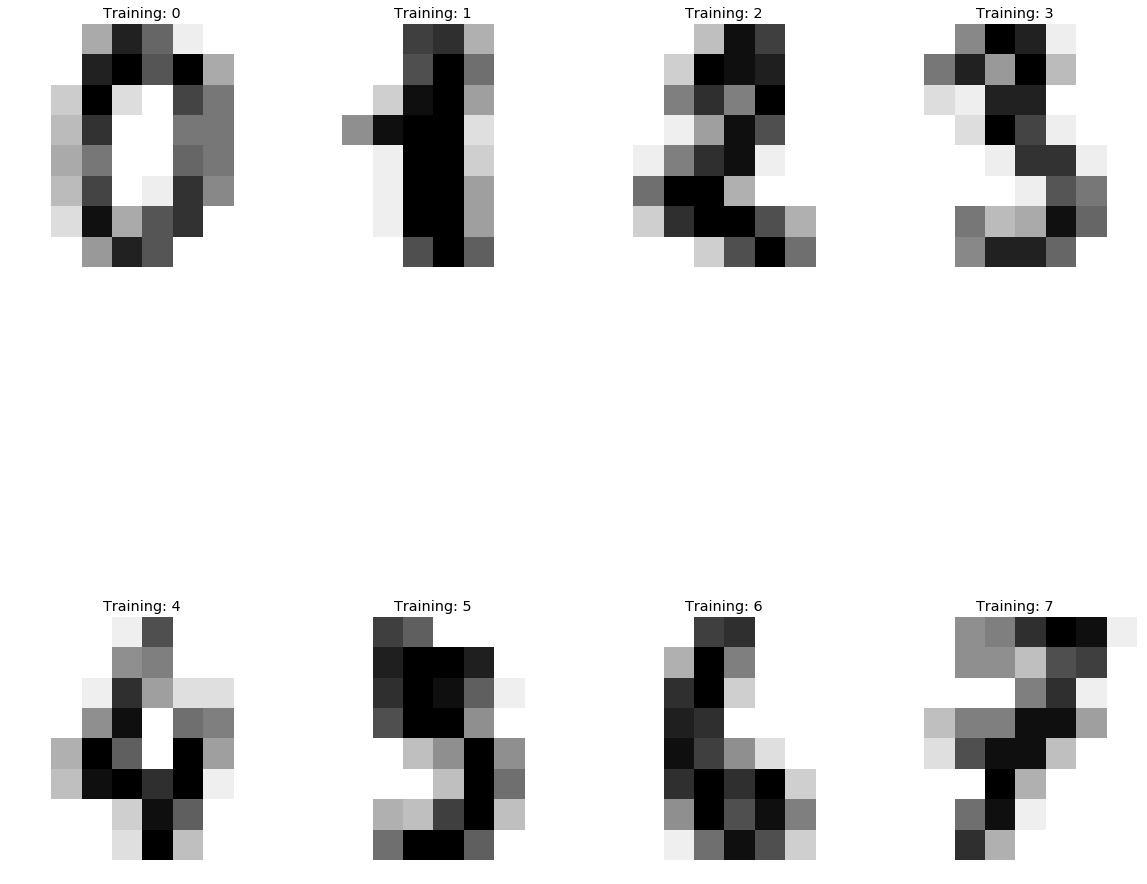

In [41]:
image_label_list = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(image_label_list[:8]):
    plot.subplot(2, 4, index + 1)
    plot.axis('off')
    plot.imshow(image, cmap = plot.cm.gray_r, interpolation = 'nearest')
    plot.title('Training: ' + str(label))